# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [45]:
# len(np.random.uniform(-90, 90,size=1500))


In [46]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" # lat={lat}&lon={lon}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    units = "imperial"
    city_url = url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1 

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pamandzi
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | bathsheba
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | zaozersk
Processing Record 11 of Set 1 | bardai
Processing Record 12 of Set 1 | kapuskasing
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | launceston
Processing Record 15 of Set 1 | port-vila
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | rostovka
Processing Record 19 of Set 1 | florence
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | kangding
Processing Record 22 of Set 1 | basco
Processing Record 23 of 

Processing Record 44 of Set 4 | juegang
Processing Record 45 of Set 4 | nuku'alofa
Processing Record 46 of Set 4 | semey
Processing Record 47 of Set 4 | plettenberg bay
Processing Record 48 of Set 4 | potsdam
Processing Record 49 of Set 4 | mirnyy
Processing Record 0 of Set 5 | esperanca
Processing Record 1 of Set 5 | ribeira brava
Processing Record 2 of Set 5 | utrik
Processing Record 3 of Set 5 | suncho corral
Processing Record 4 of Set 5 | mutare
Processing Record 5 of Set 5 | enewetak
Processing Record 6 of Set 5 | labrador city
Processing Record 7 of Set 5 | sovetskaya gavan'
Processing Record 8 of Set 5 | condoto
Processing Record 9 of Set 5 | yatou
Processing Record 10 of Set 5 | umatac village
City not found. Skipping...
Processing Record 11 of Set 5 | avarua
Processing Record 12 of Set 5 | kirovskaya
Processing Record 13 of Set 5 | korla
Processing Record 14 of Set 5 | kulia village
City not found. Skipping...
Processing Record 15 of Set 5 | lobujya
Processing Record 16 of Set

Processing Record 35 of Set 8 | sishilichengzi
City not found. Skipping...
Processing Record 36 of Set 8 | north tamworth
Processing Record 37 of Set 8 | phalaborwa
Processing Record 38 of Set 8 | iskateley
Processing Record 39 of Set 8 | mongo
Processing Record 40 of Set 8 | shanhecun
Processing Record 41 of Set 8 | colonia
Processing Record 42 of Set 8 | thunder bay
Processing Record 43 of Set 8 | dame-marie
Processing Record 44 of Set 8 | gadzhiyevo
Processing Record 45 of Set 8 | zajecar
Processing Record 46 of Set 8 | sainte-anne-des-monts
Processing Record 47 of Set 8 | kone
Processing Record 48 of Set 8 | sao gabriel da cachoeira
Processing Record 49 of Set 8 | qulsary
Processing Record 0 of Set 9 | damavand
Processing Record 1 of Set 9 | pathein
Processing Record 2 of Set 9 | changyon
Processing Record 3 of Set 9 | sept-iles
Processing Record 4 of Set 9 | pandan
Processing Record 5 of Set 9 | sumbe
Processing Record 6 of Set 9 | barkot
Processing Record 7 of Set 9 | okhotsk
Pro

Processing Record 20 of Set 12 | kiruna
Processing Record 21 of Set 12 | nizao
Processing Record 22 of Set 12 | nosy varika
Processing Record 23 of Set 12 | prince george
Processing Record 24 of Set 12 | tinajo
Processing Record 25 of Set 12 | el obeid
Processing Record 26 of Set 12 | homer
Processing Record 27 of Set 12 | dunedin
Processing Record 28 of Set 12 | gagliano del capo
Processing Record 29 of Set 12 | gaiman
Processing Record 30 of Set 12 | tadine
Processing Record 31 of Set 12 | hancheng
Processing Record 32 of Set 12 | bayanhongor
Processing Record 33 of Set 12 | deir ez-zor
Processing Record 34 of Set 12 | mount isa
Processing Record 35 of Set 12 | keflavik
Processing Record 36 of Set 12 | kontcha
Processing Record 37 of Set 12 | eastham
Processing Record 38 of Set 12 | cabedelo
Processing Record 39 of Set 12 | ipora
Processing Record 40 of Set 12 | aktau
Processing Record 41 of Set 12 | puerto ayacucho
Processing Record 42 of Set 12 | saint-joseph
Processing Record 43 o

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pamandzi,-12.7967,45.2794,82.18,69,20,16.11,YT,1715306469
1,port-aux-francais,-49.3500,70.2167,43.77,91,100,37.36,TF,1715306475
2,ilulissat,69.2167,-51.1000,19.42,79,58,0.00,GL,1715306475
3,bethel,41.3712,-73.4140,60.67,72,100,1.99,US,1715306475
4,badger,64.8000,-147.5333,55.31,43,75,11.50,US,1715306475


In [53]:
# Export the City_Data into a csv
#os.chdir("WeatherPy")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
#city_data_df = pd.read_csv("/Users/thiernodiallo/Desktop/python-api-challenge/Starter_Code/output_data/cities.csv", index_col="City_ID")
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort bragg,35.1390,-79.0060,75.04,81,0,11.50,US,1715304959
1,bilibino,68.0546,166.4372,31.96,87,97,2.51,RU,1715304959
2,port-aux-francais,-49.3500,70.2167,43.77,91,100,37.36,TF,1715304959
3,blackmans bay,-43.0167,147.3167,56.73,93,100,1.01,AU,1715304960
4,iqaluit,63.7506,-68.5145,28.13,80,75,8.05,CA,1715304960


In [55]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

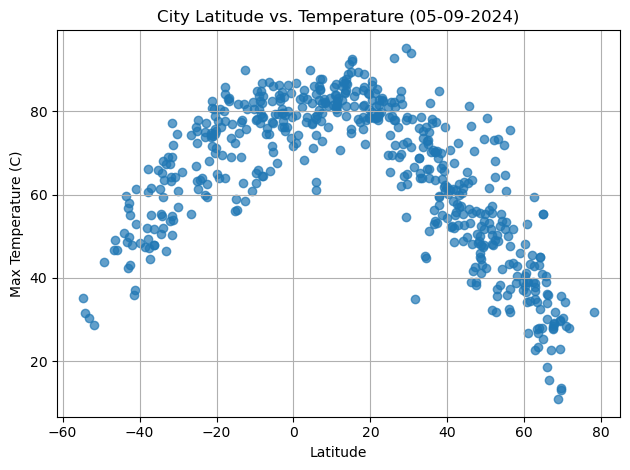

In [59]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

#Format date
from datetime import datetime
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.7) 

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
#plt.savefig("output_data/Fig1.png")
plt.savefig("output_data/City Latitude vs. temperature.png")

# Show plot
plt.show()

In [57]:
# Plot Description

In [ ]:
# Based on the data and figure, it shows that 
# the more you go away from the equator the lower the temperature  
# hence a strong correlation between temperature and the latitute.


#### Latitude Vs. Humidity

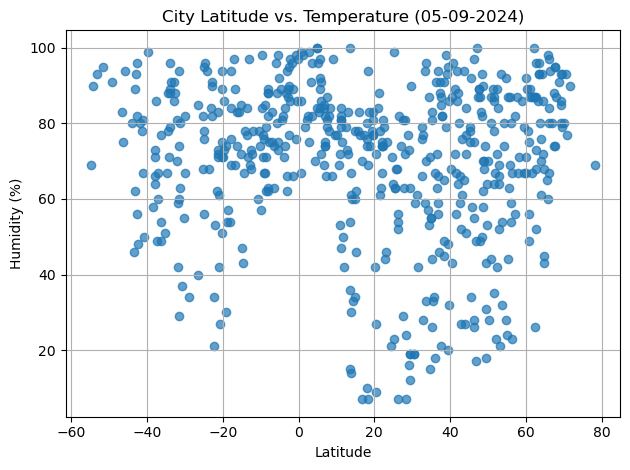

In [60]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.7) 

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/City Latitude vs. humidity.png")

# Show plot
plt.show()

# Description

In [ ]:
# The plot shows no correlation between the humidity percentage and the latitute.  

#### Latitude Vs. Cloudiness

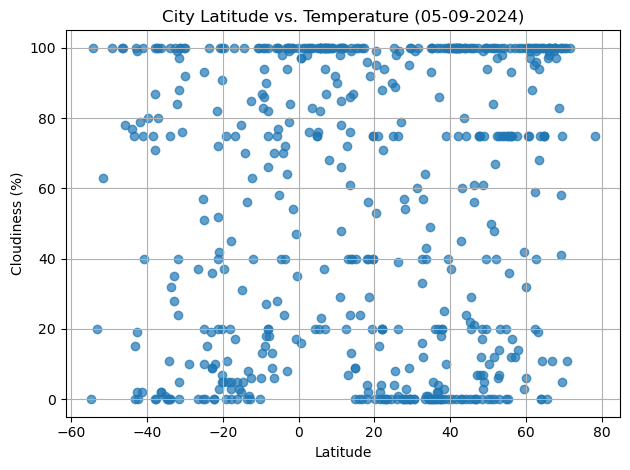

In [61]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.7) #, #edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/City Latitude vs. cloudiness.png")

# Show plot
plt.show()

# Description

In [ ]:
# The plot shows no correlation between cloudiness and latitude

#### Latitude vs. Wind Speed Plot

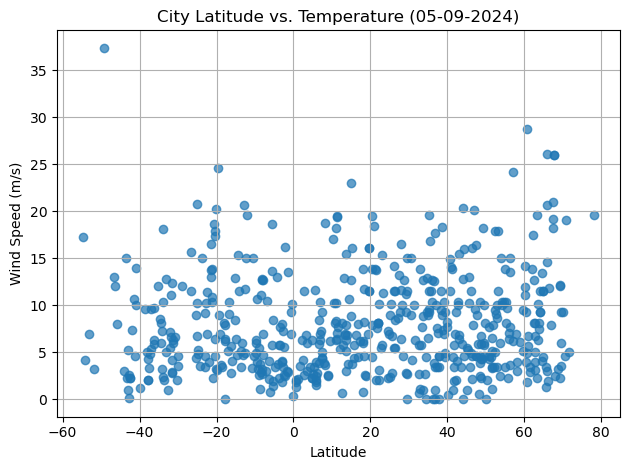

In [62]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.7) #, #edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/City Latitude vs. wind speed.png")

# Show plot
plt.show()

# Description

In [ ]:
# The plot shows no correlation between wind speed and latitude on both hemispheres

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values,y_values,):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
# Regression Values
    regress_values = x_values * slope + intercept
    
# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    

In [65]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort bragg,35.1390,-79.0060,75.04,81,0,11.50,US,1715304959
1,bilibino,68.0546,166.4372,31.96,87,97,2.51,RU,1715304959
2,port-aux-francais,-49.3500,70.2167,43.77,91,100,37.36,TF,1715304959
3,blackmans bay,-43.0167,147.3167,56.73,93,100,1.01,AU,1715304960
4,iqaluit,63.7506,-68.5145,28.13,80,75,8.05,CA,1715304960


In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort bragg,35.1390,-79.0060,75.04,81,0,11.50,US,1715304959
1,bilibino,68.0546,166.4372,31.96,87,97,2.51,RU,1715304959
4,iqaluit,63.7506,-68.5145,28.13,80,75,8.05,CA,1715304960
7,enterprise,36.0252,-115.2419,78.17,18,20,12.66,US,1715304961
8,alo,7.4178,6.7371,79.59,87,100,5.06,NG,1715304961


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,43.77,91,100,37.36,TF,1715304959
3,blackmans bay,-43.0167,147.3167,56.73,93,100,1.01,AU,1715304960
5,pisco,-13.7000,-76.2167,69.03,77,0,3.44,PE,1715304842
6,avarua,-21.2078,-159.7750,82.45,83,20,10.36,CK,1715304960
10,puerto ayora,-0.7393,-90.3518,73.54,98,47,6.93,EC,1715304891


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8643672763785821
-----------------------------------


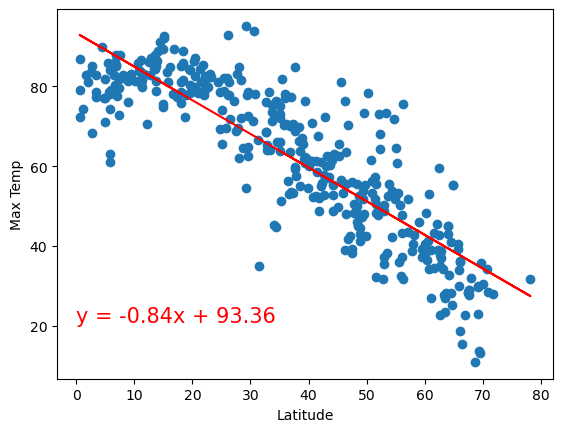

In [70]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,20),fontsize=15, color="red", va="bottom")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("output_data/Linear Reg. on Northern Hemisphere.png")
print(f'The r-value is {rvalue}')
print("-----------------------------------")


**Discussion about the linear relationship:**  The negative r value suggests that there is an negative correlation between 
    the max temperature and the latitude.  The farther you go to the northern equator, the lower the temperature.

The r-value is 0.8057444485337613
-----------------------------------


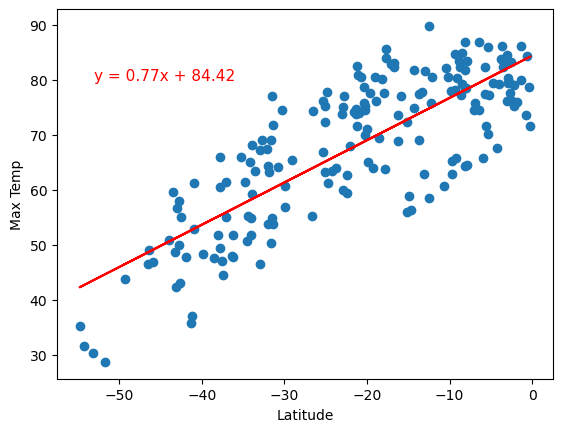

In [71]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-53,80),fontsize=11, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("output_data/Linear Reg. on Southern Hemisphere.png")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** The plot shows a positive correlation meaning that on the closer you get to the southern hemisphere, the higher the temperature becomes. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.04120051934006463
-----------------------------------


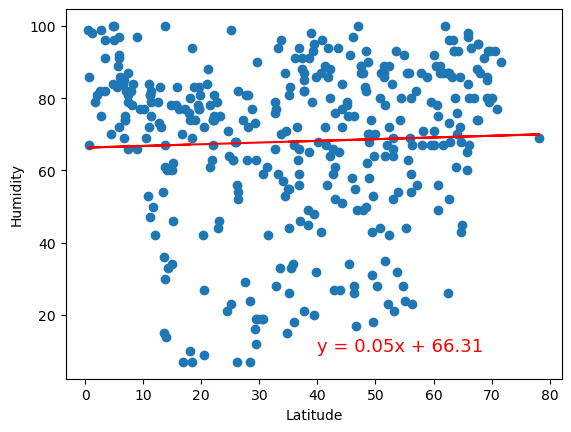

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,10),fontsize=13, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/Linear Reg. Humidity vs Latitude.png")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

In [ ]:
**Discussion about the linear relationship:**  The plot shows little to no correlation between humidity and the latitude

The r-value is 0.1393463967227046
-----------------------------------


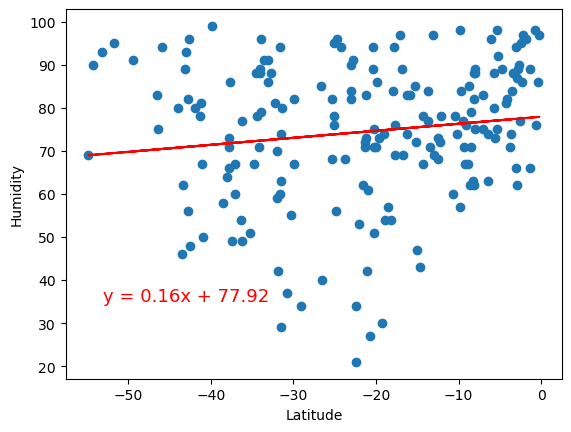

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-53,35),fontsize=13, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/Linear Reg. Southern Hemisphere.png")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** The plot shows that on the southern hemisphere; there is little to no correlation between the humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.012836755624046963
-----------------------------------


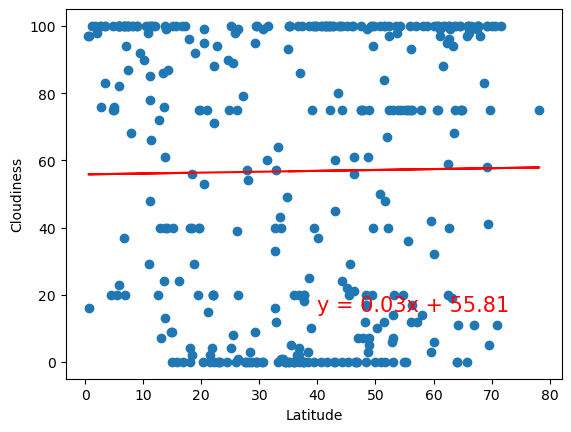

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/Linear Reg. Cloudiness vs Latitude.png")

print(f'The r-value is {rvalue}')
print("-----------------------------------")


In [ ]:
**Discussion about the linear relationship:** The plot shows little to no correlation between the latitude and cloudiness

The r-value is 0.06550454950197383
-----------------------------------


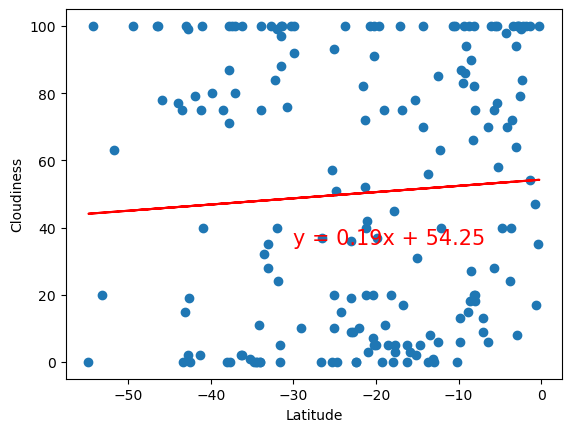

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,35),fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** On the southern hemisphere, there is little to no correlation between the cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.15052867434390813
-----------------------------------


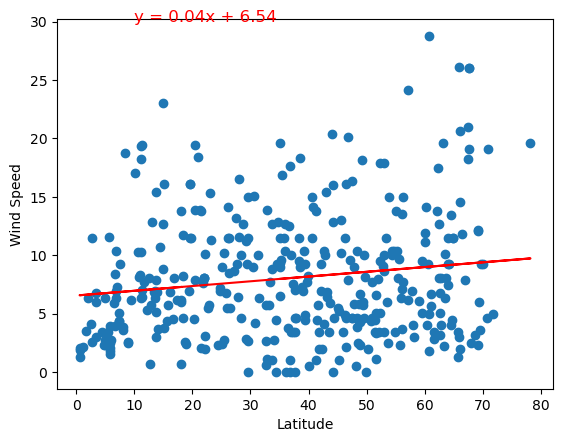

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(10,30),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

In [ ]:
**Discussion about the linear relationship:** There is very low positive correlation between wind speed and latitude on the nothern hemisphere

The r-value is -0.06833355953226317
-----------------------------------


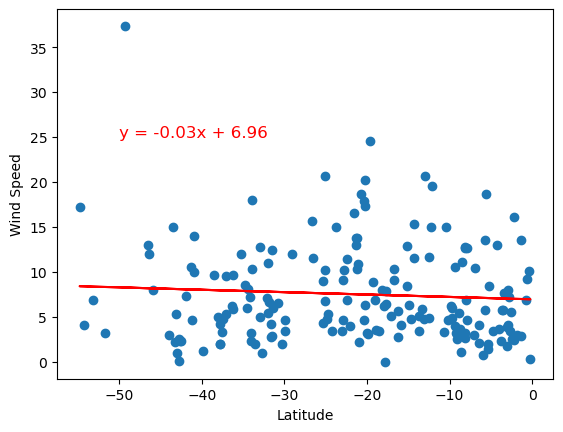

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,25),fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

In [80]:
# **Discussion about the linear relationship:** The plot very low negative correlation between wind speed and latitude on the southern hemisphere.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Based on the linear relationship between wind speed and the latitude 
# in the southern and northern hemisphere show that there is a slight opposite tendency. 
# In fact, as the 